In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os
from tqdm import tqdm

In [2]:
des_path = '../data/preprocessed/'
if not(os.path.exists(des_path)):
    print('Creating folder /data/preprocessed/ ...')
    os.mkdir(des_path)
else:
    print('Folder /data/preprocessed/ already exist.')

Folder /data/preprocessed/ already exist.


In [3]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], np.float32)
def pre_process(path, name, factor=1.3):
    """
    Preprocess image: RGB image --> Gray image --> Blur image (reduce noise) --> High Pass Filter (sharpen)         --> Constrast Limited Adaptive Histogram Equalization --> Exposure
    @INPUT:
        - path: image path
        - name: image name
        - factor: exposure factor
    @OUTPUT:
        - imgAHE: preprocessed image
    """

    img = cv2.imread(os.path.join(path, name))

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray image

    imgBlur = cv2.GaussianBlur(imgGray, (3,3), 0)   # reduce noise

    imgH = cv2.filter2D(imgBlur, -1, kernel)        # sharpen

    AHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))# Contrast Limited Adaptive Histogram Equalization 
    imgAHE = AHE.apply(imgH)
    imgAHE = np.array(imgAHE)

    img_processed = imgAHE*factor   # exposure

    return img_processed

In [4]:
train_path = '../data/train/'

names = os.listdir(train_path)

for name in tqdm(names):
    img = pre_process(train_path, name)
    cv2.imwrite(os.path.join(des_path,name), img)

100%|███████████████████████████████████████████████████████████████████████████| 33402/33402 [02:43<00:00, 204.26it/s]


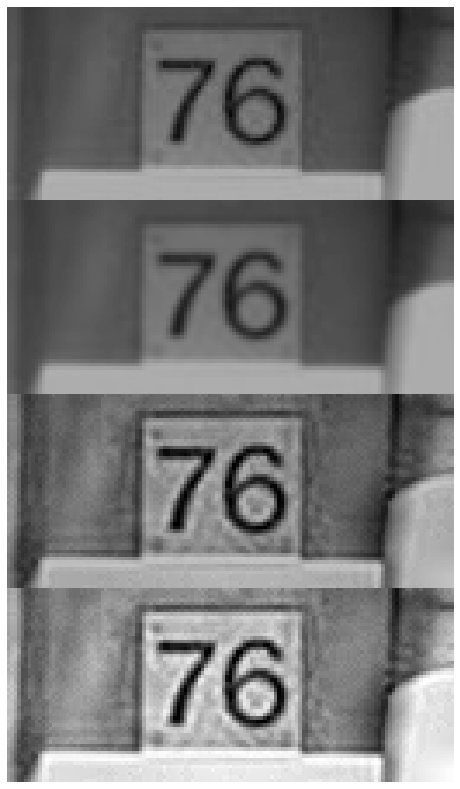

In [5]:
# DEMO

img = cv2.imread(os.path.join(train_path, '10120.png'))

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgBlur = cv2.GaussianBlur(imgGray, (3,3), 0)

imgH = cv2.filter2D(imgBlur,-1, kernel)

AHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imgAHE = AHE.apply(imgH)
imgAHE = np.array(imgAHE)

imgExp = imgAHE*1.3

imgShow = np.vstack([imgGray, imgBlur, imgAHE, imgExp])
plt.figure(figsize=(8,20))
plt.imshow(imgShow, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('./train_label.csv')
df.head()

,name,height,left,top,width,label
0,1.png,219,246,77,81,1
1,1.png,219,323,81,96,9
2,2.png,32,77,29,23,2
3,2.png,32,98,25,26,3
4,3.png,15,17,5,8,2


(350, 741)


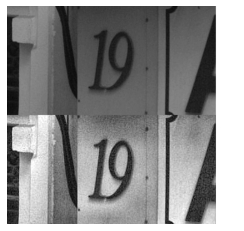

In [8]:
# import matplotlib
# dpi = matplotlib.rcParams['figure.dpi']
# figsize = img.shape[1]/dpi, img.shape[0]/dpi
# plt.figure(figsize=figsize)

name = '1.png'
img = cv2.imread(os.path.join(train_path, name))
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_processed = cv2.imread(os.path.join(des_path, name), 0)
print(img_processed.shape)

plt.imshow(np.vstack([imgGray, img_processed]), cmap='gray')
plt.axis('off')
plt.show()

In [9]:
digits = df[df.name==name]
digits

,name,height,left,top,width,label
0,1.png,219,246,77,81,1
1,1.png,219,323,81,96,9


In [10]:
h = digits.height.values[0]
l = digits.left.values[0]
w = digits.width.values[0]
t = digits.top.values[0]

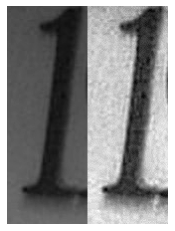

In [11]:
im = imgGray[t:t+h, l:l+w]
im1 = img_processed[t:t+h, l:l+w]

plt.imshow(np.hstack([im, im1]), cmap='gray')
plt.axis('off')
plt.show()

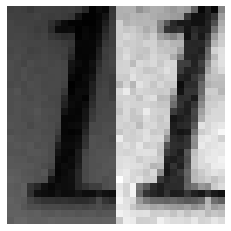

In [12]:
im_rsz = cv2.resize(im, (16,32))
im_rsz1 = cv2.resize(im1, (16,32))

plt.imshow(np.hstack([im_rsz, im_rsz1]), cmap='gray')
plt.axis('off')
plt.show()